In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [2]:
data = pd.read_csv('petrol_consumption.csv')
data = data.sort_values(by='Petrol_Consumption')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
6,8.0,5319,11868,0.451,344
4,8.0,4399,431,0.544,410
3,7.5,4870,2351,0.529,414
5,10.0,5342,1333,0.571,457
24,8.5,4574,2619,0.551,460


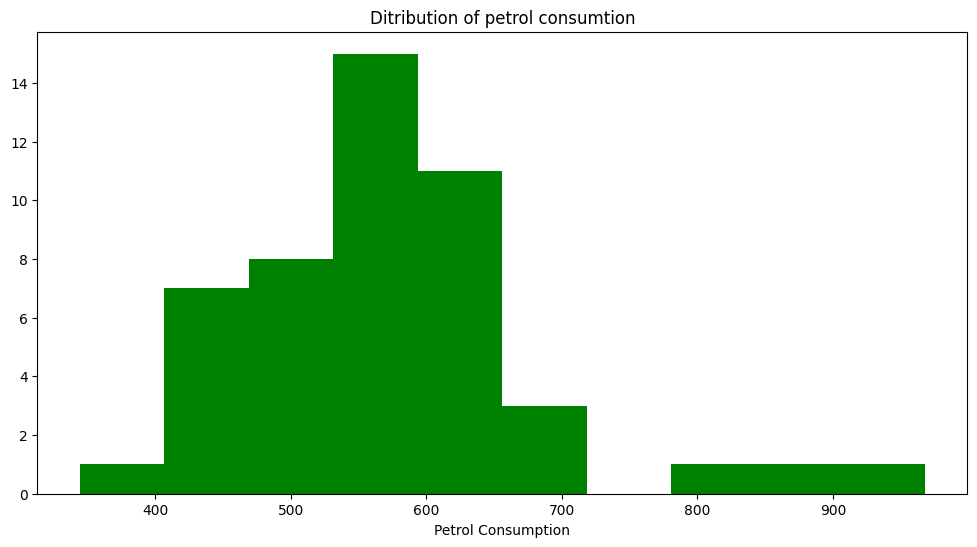

In [3]:
plt.figure(figsize = (12, 6))
plt.hist(data['Petrol_Consumption'], color='green', bins = 10)
plt.xlabel('Petrol Consumption')
plt.title(label = 'Ditribution of petrol consumtion', color = 'black')
plt.show()

In [4]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


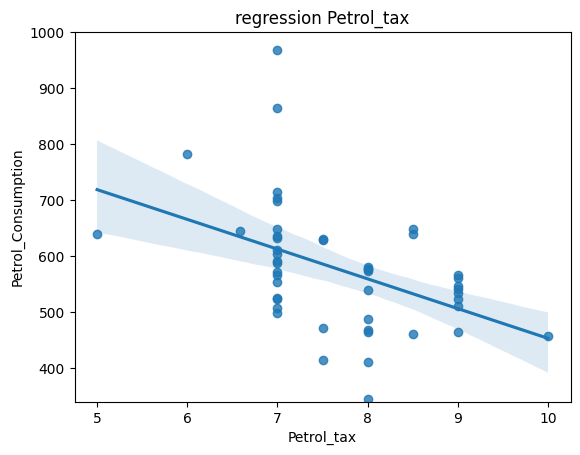

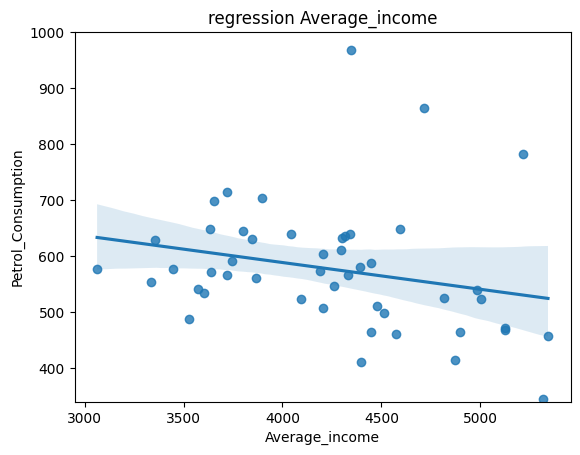

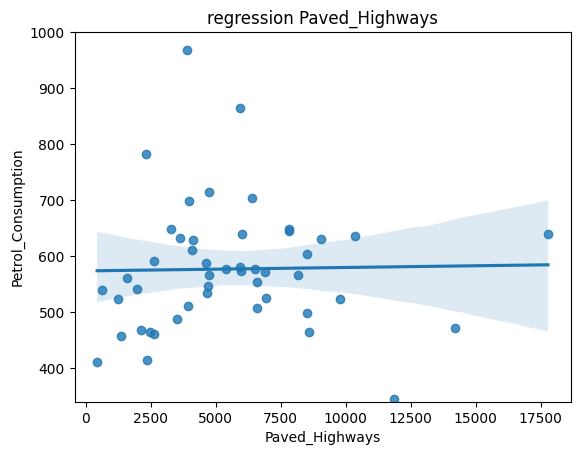

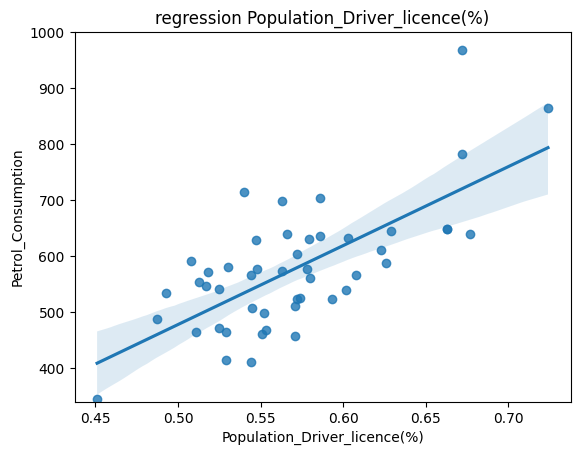

In [5]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
for i in variables:
    plt.figure()
    sb.regplot(x = i, y = 'Petrol_Consumption', data = data).set(title = f"regression {i}")
    plt.ylim(340, 1000)


In [6]:
 corr = data.corr()

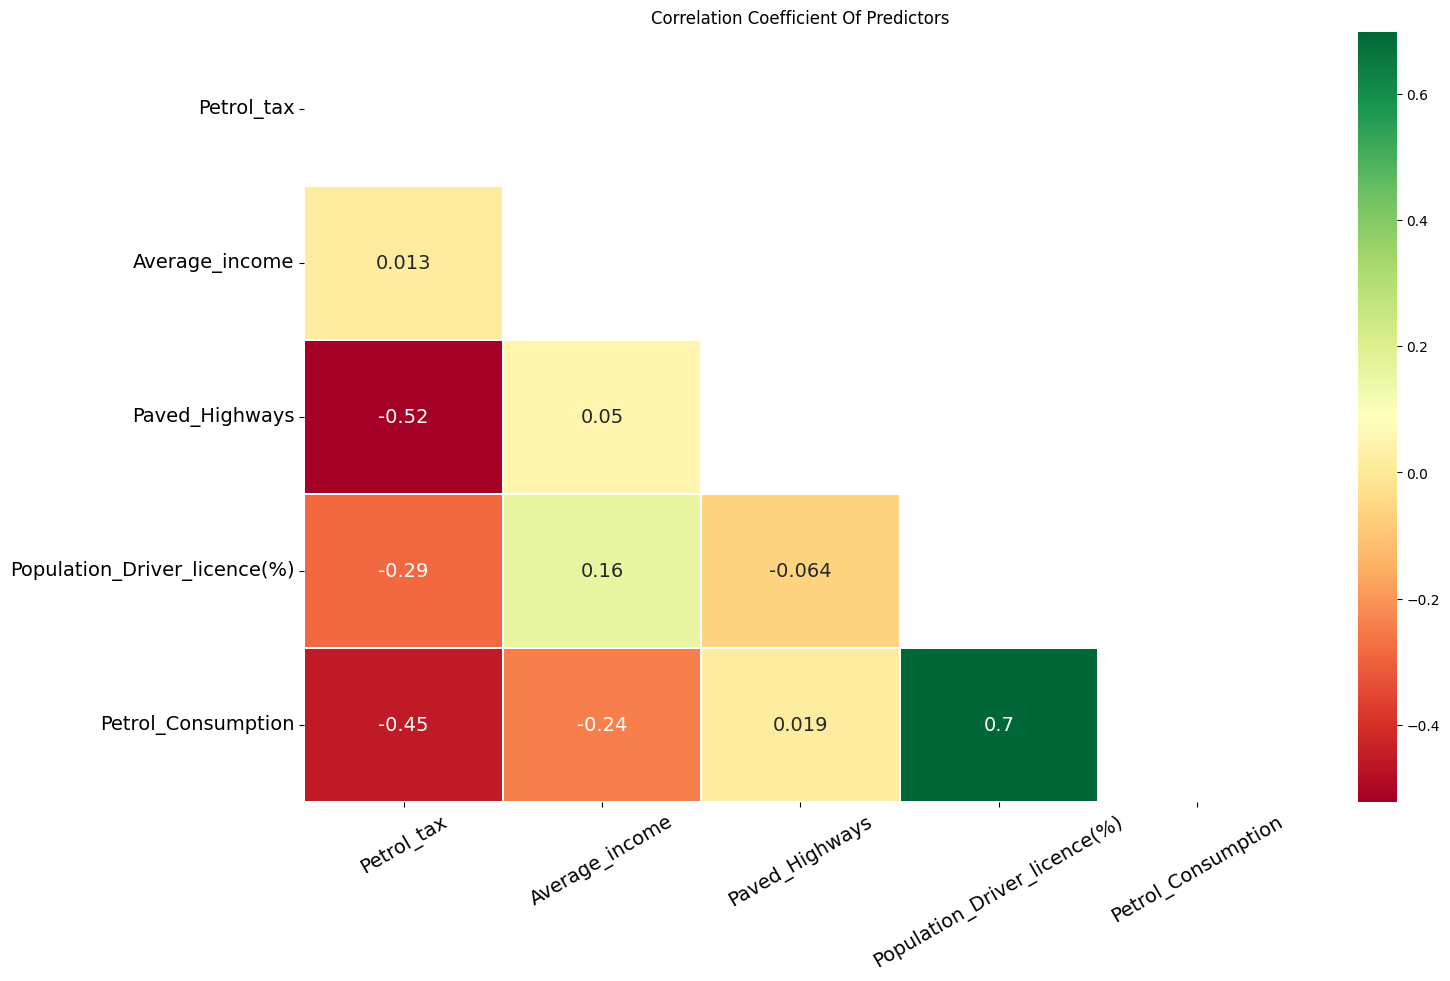

In [7]:
plt.figure(figsize = (16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))

fig = sb.heatmap(corr, cmap='RdYlGn', mask = mask, linewidths=0.30, annot = True, annot_kws = {'size' : 14})
fig.set_xticklabels(fig.get_xticklabels(), rotation = 30)
plt.title('Correlation Coefficient Of Predictors')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [8]:
y = data['Petrol_Consumption']
x = data[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]

In [9]:
SEED = 48
x_train, x_test, y_train, y_test = TTS(x, y, test_size = 0.2, random_state = SEED)

In [10]:
model = LR().fit(x_train, y_train)